<center><img src="http://agilesoda.ai/resources/ecoletree/img/en/home/imgCi01.png"></center>
<h1 align=center><font size = 6> Lecture 3: Reinforcement Learning Introduction</font></h1>

# 0. Outlines and Goals
- Definition of a Markov decision process (MDP)
- Definition of reinforcement learning problem
- Anatomy of a RL algorithm
- Brief overview of RL algorithm types
- Goals:
    - Understand definitions & notation
    - Understand the underlying reinforcement learning objective
    - Get summary of possible algorithms

# 1. Terminology and notation
- State, action, observation, policy, Markov decision process (MDP),...
    - Fully observable: state == observation
    - Partialy observable: state != observation

<center><img src="../assets/img/terminology.png"></center>

# 2. Imitation learning (Previous lecture)
- Colect data from human (expert system) => training the policy using collected data (supervised learning)
![alt](../assets/img/imitation_1.png)

# 3. Reward functions
- Reward (or sometimes *cost*) is introduced
![alt](../assets/img/reward.png)

# 4. Markov Chain
- Markov property: *the next state only depends on the **current** state and not on any of the states previous to the current*
![alt](../assets/img/markov_chain.png)

# 5. Markov Decision Process
- Markov property: *the next state only depends on the **current** state and not on any of the states previous to the current*
![alt](../assets/img/mdp.png)
![alt](../assets/img/reward_1.png)

# 6. Partially Observable Markov Decision Process
- Note: Emission probability == Termination probability
![alt](../assets/img/pomdp.png)

# 7. The goal of reinforcement learning
- Markov property: *the next state only depends on the **current** state and not on any of the states previous to the current*
![alt](../assets/img/goal_rl.png)

# 8. Expectations and stochastic systems
- Markov property: *the next state only depends on the **current** state and not on any of the states previous to the current*
![alt](../assets/img/expectation.png)

# 9. Structure of Reinforcement Learning Algorithms
- Most of RL algorithms have the following structure:
![alt](../assets/img/anatomy.png)

# 10. Types of RL algorithms

<center><img src="../assets/img/objective_function.png"></center>

- **Policy gradients:** directly optimizing the above objective
- **Value-based:** estimate value function or Q-function of the optimal policy (no explicit policy)
- **Actor-critic:** estimate value function or Q-function of the current policy, use it to improve policy
- **Model-based RL:** estimate the transition model, and then…
    - Use it for planning (no explicit policy)
    - Use it to improve a policy

# 11. Types of RL algorithms

<center><img src="../assets/img/taxonomy.png"></center>


# 12. Model-based approach
- In model-based approach, we need to build a model **p**
- And use **p** to *guide* the agent policy.
![alt](../assets/img/model_based.png)


# 13. Value-based approach

- Estimating the Q value or V value.
- No have a explicit policy. Just use Q (or V) to take an action

![alt](../assets/img/value_based.png)


# 14. Policy-based approach

- Optimizing the policy by maximizing the expected rewards (returns)

![alt](../assets/img/policy_based.png)


# 15. Actor critic approach

- Optimizing the policy by maximizing the TD error

![alt](../assets/img/actor_critic.png)


# 16. Other aspects

- Sample efficiency: On-policy algorithms vs off-policy algorithms
- MDP vs POMDP
- Stochastic vs Deterministic
- Episodic vs Non-episodic
- Continuous vs Discrete

# 17. Current state-of-the-art Algorithms (will introduced in the next lectures)

- Value-based approach:
    - DQN, DDQN, DRQN, ...
- Policy-based approach:
    - REINFORCE
    - Natural Policy Gradient
    - TRPO
- Actor-Critic approach:
    - A2C, A3C
    - SAC
    - DDPG
- Model-based approach:
    - Dyna
    - Guided policy search

# 18. Example 1: Atari games with DQN
- Playing Atari with deep reinforcement learning

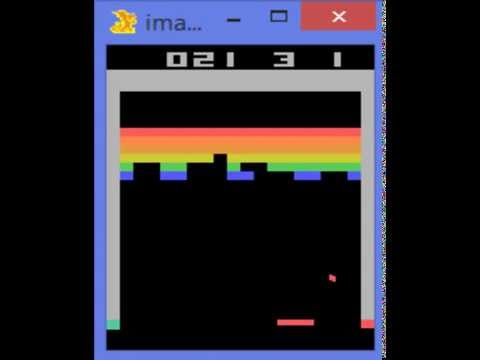

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('V1eYniJ0Rnk')

# 19. Example 2: Robots and model-based RL
- End-to-end training of deep visuomotor policies

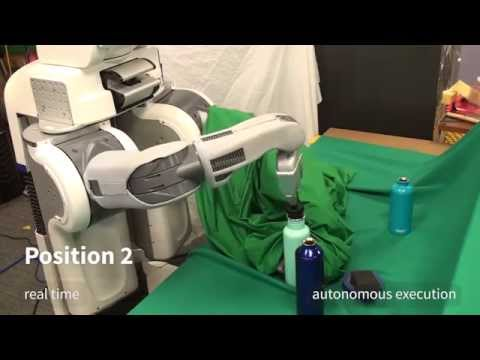

In [2]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('Q4bMcUk6pcw')

# 20. Example 3: Walking with policy gradients
- High-dimensional continuous control with generalized advantage estimation

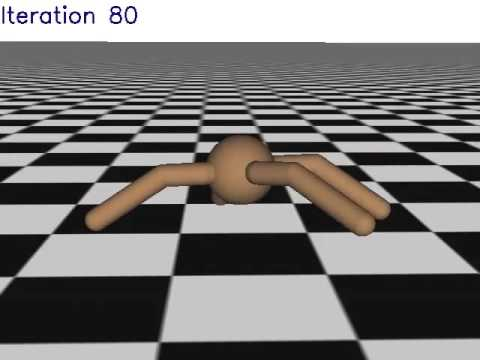

In [3]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('SHLuf2ZBQSw')

# 21. Practice: Markov Decision Process
_This notebook is inspired by the awesome_ [CS294](https://github.com/berkeleydeeprlcourse/homework/blob/36a0b58261acde756abd55306fbe63df226bf62b/hw2/HW2.ipynb) _by Berkeley_

First, let's define a simple MDP from this picture:
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Markov_Decision_Process.svg/800px-Markov_Decision_Process.svg.png' width=500px>

In [1]:
transition_probs = {
    's0': {
        'a0': {'s0': 0.5, 's2': 0.5},
        'a1': {'s2': 1}
    },
    's1': {
        'a0': {'s0': 0.7, 's1': 0.1, 's2': 0.2},
        'a1': {'s1': 0.95, 's2': 0.05}
    },
    's2': {
        'a0': {'s0': 0.4, 's1': 0.6},
        'a1': {'s0': 0.3, 's1': 0.3, 's2': 0.4}
    }
}
rewards = {
    's1': {'a0': {'s0': +5}},
    's2': {'a1': {'s0': -1}}
}

from mdp import MDP
mdp = MDP(transition_probs, rewards, initial_state='s0')

We can now use MDP just as any other gym environment:

In [2]:
print('initial state =', mdp.reset())
next_state, reward, done, info = mdp.step('a1')
print('next_state = %s, reward = %s, done = %s' % (next_state, reward, done))

initial state = s0
next_state = s2, reward = 0.0, done = False


but it also has other methods that you'll need for Value Iteration

In [3]:
print("mdp.get_all_states =", mdp.get_all_states())
print("mdp.get_possible_actions('s1') = ", mdp.get_possible_actions('s1'))
print("mdp.get_next_states('s1', 'a0') = ", mdp.get_next_states('s1', 'a0'))
print("mdp.get_reward('s1', 'a0', 's0') = ", mdp.get_reward('s1', 'a0', 's0'))
print("mdp.get_transition_prob('s1', 'a0', 's0') = ",
      mdp.get_transition_prob('s1', 'a0', 's0'))

mdp.get_all_states = ('s2', 's1', 's0')
mdp.get_possible_actions('s1') =  ('a1', 'a0')
mdp.get_next_states('s1', 'a0') =  {'s2': 0.2, 's1': 0.1, 's0': 0.7}
mdp.get_reward('s1', 'a0', 's0') =  5
mdp.get_transition_prob('s1', 'a0', 's0') =  0.7


# 22. Visualizing MDPs

You can also visualize any MDP with the drawing fuction donated by [neer201](https://github.com/neer201).

You have to install graphviz for system and for python. For ubuntu just run:

1. `sudo apt-get install graphviz`
2. `pip install graphviz`
3. restart the notebook

In [4]:
from mdp import has_graphviz
from IPython.display import display
print("Graphviz available:", has_graphviz)

Graphviz available: True


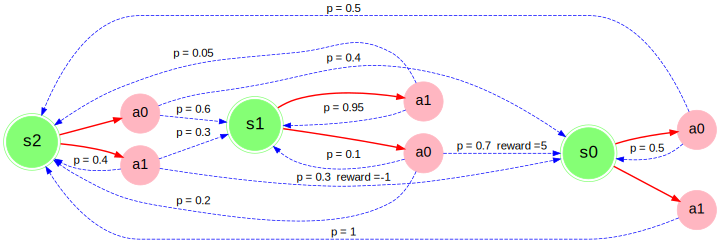

In [5]:
if has_graphviz:
    from mdp import plot_graph, plot_graph_with_state_values, \
        plot_graph_optimal_strategy_and_state_values

    display(plot_graph(mdp))

# 23. Build simple algorithm to solve the MDP (Get the highest reward)
- Look at the graph, we can easily find the best solution: s0 => a1 => s2 => a0 => s1 => a0 => s0
![alt](../assets/img/mdp_example.png)

In the next lectures, we will try to use some RL algorithms to solve this MDP

# 24. Conclusion
- Reinforcement learning is modeled as Markov Decision Process
- RL can be devided into value-based approach, policy-based approach, and actor-critic approach.
- Other ways to classify RL approaches:
    - On-Policy vs Off-policy
    - Model-free vs Model-based
    - Stochastic policy vs Deterministic policy

# 25. References
1. David Silver Course: http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching.html
2. Practical Reinforcement Learning Coursera
3. Berkeley Deep Reinforcement Learning Course: http://rail.eecs.berkeley.edu/deeprlcourse